In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import tensorflow as tf
import numpy as np
import edward as ed
tf.contrib.distributions.kl = tf.contrib.distributions.kl_divergence
from matplotlib import pyplot as plt
%matplotlib inline

In [106]:
tf.__version__

'1.3.0'

In [107]:
from svi_nnmf_edward import *

In [108]:
R_= np.array([[1,2,2,4,5],\
            [5,5,5,2,1],\
            [5,5,5,2,1],\
            [1,2,1,4,5],\
            [2,2,1,4,5],\
            [4,5,5,2,2],\
            [1,2,1,5,5],\
            [5,5,5,2,1],\
            [5,5,5,2,1],\
            [1,2,1,4,5],\
            [2,2,1,4,5],\
            [4,5,5,2,2],\
            [1,2,1,5,5],\
            [5,5,5,2,1],\
            [5,5,5,2,1],\
            [1,2,1,4,5],\
            [2,2,1,4,5],\
            [4,5,5,2,2],\
            [1,2,1,5,5],\
            [5,5,5,2,1],\
            [2,2,1,5,4]])
            

mask_ = np.array([[1,1,1,1,1],\
                  [1,0,0,0,0],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1],\
                  [1,1,1,1,1]])

# convert everything to tensor
R_ = R_.astype(np.float32)

In [109]:
def plot_R(rhats, r=None, title=''):
    _, n_items = rhats.shape
    f, axes = plt.subplots(1, n_items, sharex=True, sharey=True)
    i = 0
    for j in range(n_items):
        if r is not None:
            axes[j].axvline(x=r[j], color='r')
        axes[j].hist(rhats[:,j])
    plt.xlim([-2,7])
    f.suptitle(title)
    plt.show()


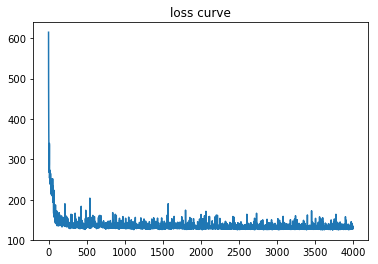

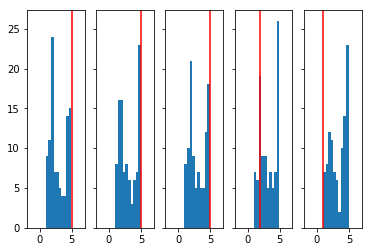

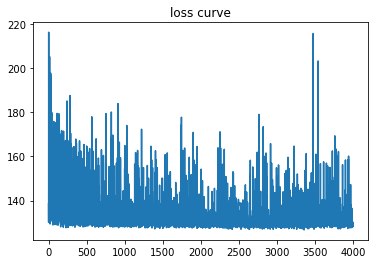

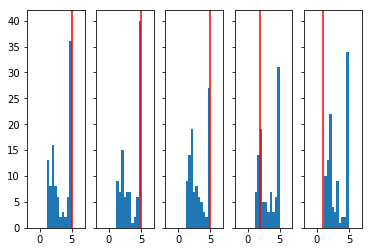

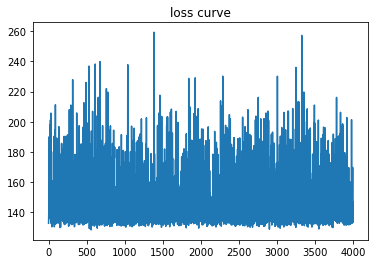

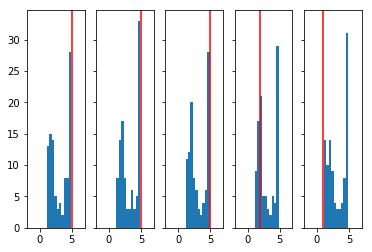

In [110]:
tf.reset_default_graph()
model = SVI_NNMF(R_)
model.inference.initialize(scale={model.R_hats: 105/50})
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    model.train(mask_, sess)
    samples = model.sample_user_ratings(1, 100, sess)
    plot_R(samples, R_[1,:])
    
    mask_[1,0]=1
    model.train(mask_, sess)
    samples = model.sample_user_ratings(1, 100, sess)
    plot_R(samples, R_[1,:])
    
    mask_[1,4]=1
    model.train(mask_, sess)
    samples = model.sample_user_ratings(1, 100, sess)
    plot_R(samples, R_[1,:])
    